<a href="https://colab.research.google.com/github/T-Schwab/QM2/blob/main/GDAT_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd

In [2]:
# Read the shapefile
gdf = gpd.read_file("GDAT_v1_catchments.shp")

# Print the first few rows of the GeoDataFrame
print(gdf.head())

   Feature_ID     Dam_Name Alt_Name Reservoir Alt_Reserv         River  \
0           1  Beni Bahdel     None      None       None         Tafna   
1           2  Bou Hanifia     None      None       None     El Hammam   
2           3     Bakhadda     None      None       None          Mina   
3           4    Boughzoul     None      None       None  Nahar Ouasel   
4           5     Ain Zada     None      None       None    Bou Sellam   

  Alt_River           Main_basin            Sub_basin Continent  ...  \
0      None  Mediterranean Coast  Algerian west coast    Africa  ...   
1      None  Mediterranean Coast  Algerian west coast    Africa  ...   
2      None  Mediterranean Coast               Chelif    Africa  ...   
3      None  Mediterranean Coast               Chelif    Africa  ...   
4      None           Bou Sellam  Algerian east coast    Africa  ...   

  Alt_Capac           Source Comment Editor  Main_P_Map intp_dist  \
0      None  AQUASTAT, GRAND    None    Sid  Irrigati

<Axes: >

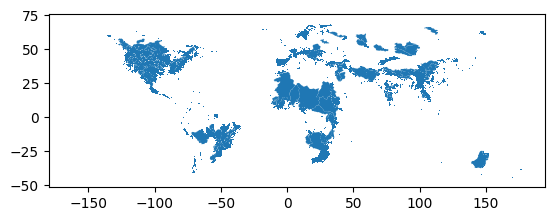

In [3]:
gdf.plot()

In [4]:
import pandas as pd

In [7]:
df = pd.DataFrame(gdf)

# Filter for only Africa
df_africa = df[df['Continent'] == 'Africa']

# Verify the filtered data
print(df_africa)


      Feature_ID                         Dam_Name Alt_Name Reservoir  \
0              1                      Beni Bahdel     None      None   
1              2                      Bou Hanifia     None      None   
2              3                         Bakhadda     None      None   
3              4                        Boughzoul     None      None   
4              5                         Ain Zada     None      None   
...          ...                              ...      ...       ...   
5773        6239  Henry Hallam (or Prince Edward)     None      None   
5774        6240                           Rufaro     None      None   
5775        6241                           Kudzwe     None      None   
5776        6242                         Blockley     None      None   
5777        6243                         Bumururu     None      None   

     Alt_Reserv         River Alt_River           Main_basin  \
0          None         Tafna      None  Mediterranean Coast   
1      

<ipython-input-15-27d94fac19fc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords_df['geometry'] = coords_df['GDAT_Coord'].apply(wkt.loads)


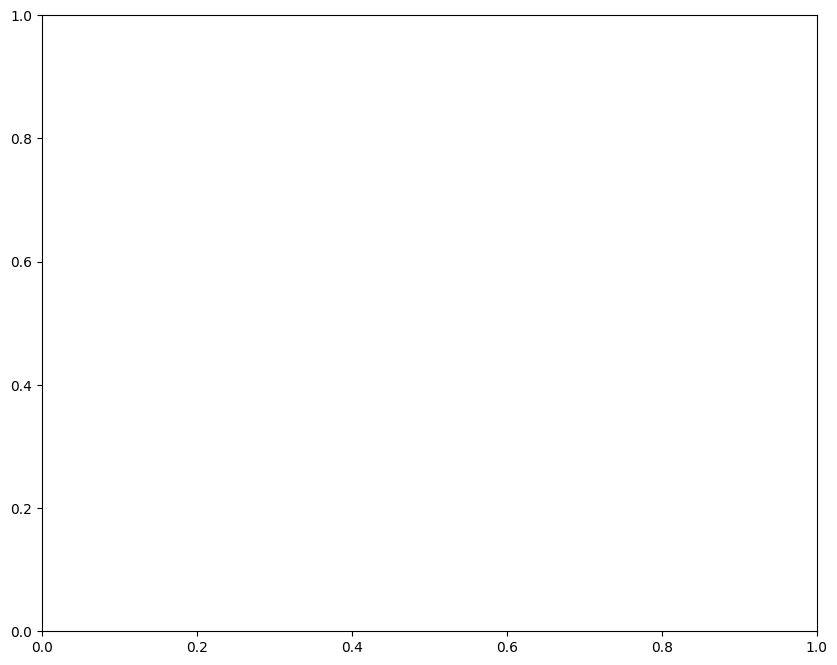

In [15]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import matplotlib.pyplot as plt


# Step 1: Select only the 'GDAT_Coord' column
coords_df = df_africa[['GDAT_Coord']]

# Step 2: Convert the WKT strings into Shapely Point objects
coords_df['geometry'] = coords_df['GDAT_Coord'].apply(wkt.loads)

# Step 3: Create a GeoDataFrame from the coordinates
coords_gdf = gpd.GeoDataFrame(coords_df, geometry='geometry')

# Step 4: Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
coords_gdf.set_crs('EPSG:4326', inplace=True)

# Step 5: Plot the points on a map
fig, ax = plt.subplots(figsize=(10, 8))



In [ ]:
# Optional: Plot the world boundaries (using geopandas built-in dataset)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgray')

# Plot the points (the 'geometry' column holds the geographic data)
coords_gdf.plot(ax=ax, color='red', marker='o', label='Dam Locations')

# Customize the plot
ax.set_title("Dam Locations on Map", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()

# Show the plot
plt.show()